In [24]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Salaries.csv")   
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Data Preparation

In [26]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [27]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [28]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [30]:
df.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


Converting the Columns with String values into integers to use those features for M.L. 

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

list1 = ['rank','discipline','sex']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))  # astype will ensure that all values in the column are considered as strings

df  # Now the whole data is converted from string data into numerical for M.L.

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# Data Cleaning

In [33]:
df.corr()['rank'].sort_values()

discipline      -0.086266
sex              0.132492
yrs.service      0.447499
salary           0.522207
yrs.since.phd    0.525500
rank             1.000000
Name: rank, dtype: float64

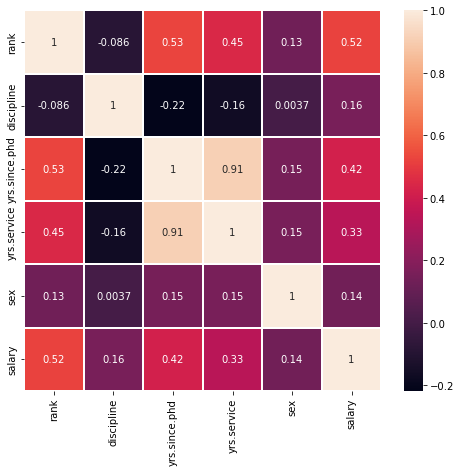

In [34]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,linewidths = 2)
plt.show()

In [35]:
# To drop a column which shows negative correlation i.e. discipline

df.drop('discipline',axis=1,inplace=True)
df

,rank,yrs.since.phd,yrs.service,sex,salary
0,2,19,18,1,139750
1,2,20,16,1,173200
2,1,4,3,1,79750
3,2,45,39,1,115000
4,2,40,41,1,141500
...,...,...,...,...,...
392,2,33,30,1,103106
393,2,31,19,1,150564
394,2,42,25,1,101738
395,2,25,15,1,95329


# ENCODING - Standarad Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
st=StandardScaler()
scale=st.fit_transform(df)
df_new=pd.DataFrame(scale,columns=df.columns)
df_new

,rank,yrs.since.phd,yrs.service,sex,salary
0,0.649257,-0.257550,0.029669,0.330058,0.860919
1,0.649257,-0.179854,-0.124300,0.330058,1.966672
2,-0.672564,-1.422982,-1.125098,0.330058,-1.122495
3,0.649257,1.762533,1.646343,0.330058,0.042760
4,0.649257,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...
392,0.649257,0.830187,0.953483,0.330058,-0.350418
393,0.649257,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.529446,0.568560,0.330058,-0.395640
395,0.649257,0.208623,-0.201284,0.330058,-0.607502


# Exploratory Data Analysis & Visualization

Univariate Analysis

In [38]:
df_new.skew()

rank            -1.151164
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


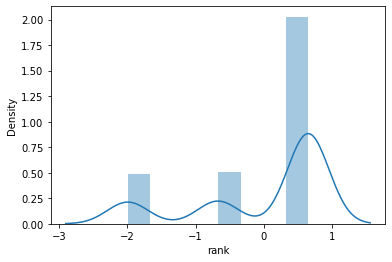

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


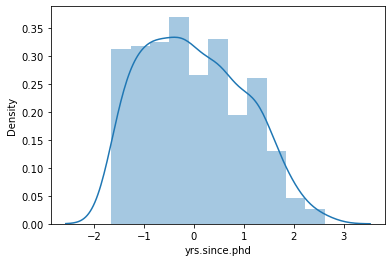

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


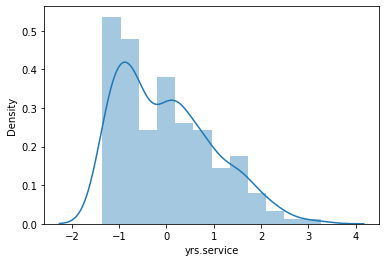

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


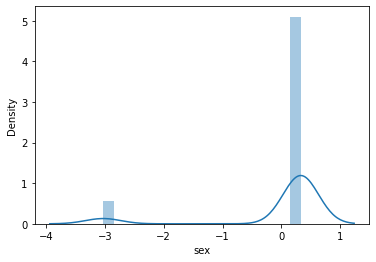

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


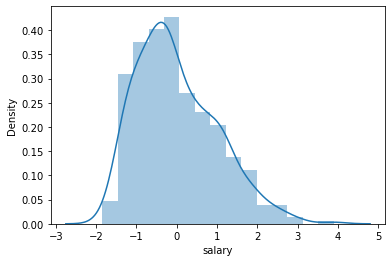

In [39]:
# Taking Skewness threshold as +/- 0.15
# All columns are skewed
# Confirming the same using distribution plots
# Also disciple column is Bimodal 

for i in df_new.columns:
    sns.distplot(df_new[i])
    plt.show()

From above distribution plots & skewness value we can confirm that the following columns need transformation :
   1. rank
   2. yrs.since.phd
   3. yrs.service
   4. sex
   5. salary

Using Power Transformation for removing skewnees from the data

In [40]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [41]:
data = pt.fit_transform(df_new)
df_new = pd.DataFrame(data,columns=df_new.columns)

In [42]:
df_new.skew()             # Now the skewness has been reduced

rank            -0.761231
yrs.since.phd    0.046791
yrs.service      0.113112
sex             -2.709958
salary           0.053080
dtype: float64

Bivarate Analysis

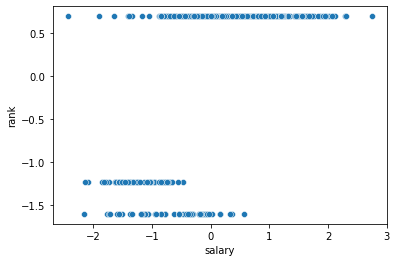

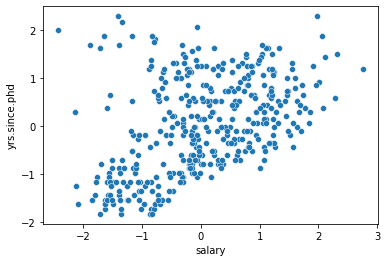

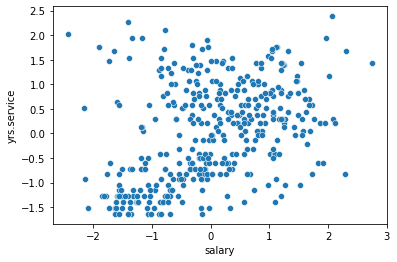

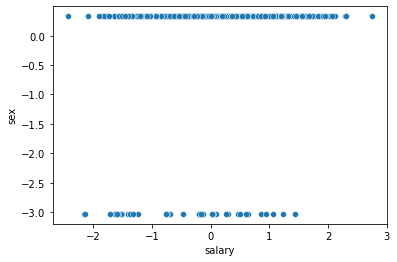

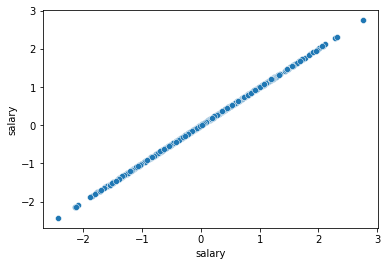

In [43]:
for i in df_new.columns:
    sns.scatterplot(x='salary',y=i,data=df_new)
    plt.show()

From above scatter plots we can see that 'rank ' , 'yrs.since.phd' , 'yrs.service ', 'sex ' show strong relationship whith the salary 

# Splitting the DataFrame

In [44]:
#Dividing the data into Independent columns & Target column

x = df_new.iloc[:,:-1]  # Independent Columns

y = pd.DataFrame(df_new.iloc[:,-1])  # Target Column

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression            # To work with regression model
lm = LinearRegression()

In [54]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.35)
    lm.fit(x_train,y_train)
    if lm.score(x_train,y_train)*100 > 50.0:
        print("At random state",i,"The model preforms very well")
        print("At random state :-",i, "Model Accuracy score is :-",lm.score(x_train,y_train)*100,'\n')

At random state 441 The model preforms very well
At random state :- 441 Model Accuracy score is :- 50.638101716054294 

At random state 582 The model preforms very well
At random state :- 582 Model Accuracy score is :- 53.05142308904214 



From Above we can see that the model is performing best at Random state 582 as the Accuracy score is heighest at 582. Therefore using random_state = 582 for training the model.

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=582,test_size=0.35)

In [56]:
x_train.shape

(258, 4)

In [57]:
x_test.shape

(139, 4)

In [58]:
y_train.shape

(258, 1)

In [59]:
y_test.shape

(139, 1)

In [60]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error         # To find out error in the equation
import warnings
warnings.filterwarnings('ignore')

Testing Various Models i.e.:-
   1. Linear Regression
   2. L1 - Lasso Regression
   3. L2 - Ridge Regression
   4. ElasticNet

To check which one performs best

In [61]:
lm = LinearRegression()
ls  = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)
enr = ElasticNet (alpha=0.0001)

models=[lm,ls,rd,enr]

for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy Score of",i,'is:-',i.score(x_train,y_train))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('\n')

Accuracy Score of LinearRegression() is:- 0.5305142308904214
Mean squared error : 0.8740363705348101


Accuracy Score of Lasso(alpha=0.0001) is:- 0.5305139856788383
Mean squared error : 0.873948753799249


Accuracy Score of Ridge(alpha=0.0001) is:- 0.5305142308902591
Mean squared error : 0.8740362996252197


Accuracy Score of ElasticNet(alpha=0.0001) is:- 0.5305141439671315
Mean squared error : 0.8739835030100942




From above we can see that the Mean Squared Error in case of Lasso Regression is Minimum.

Hence, here Lasso Regression model is working best for the Data

In [62]:
ls  = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

lspred = ls.predict(x_test)
print(mean_squared_error(y_test,lspred))

0.5305139856788383
0.873948753799249


# Saving the Model

In [63]:
import pickle

filename = 'Salary_Prediction.pkl'

pickle.dump(ls, open(filename,'wb'))  # 'wb' write binary mode - Use to save model